In [1]:
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

In [2]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


In [3]:

def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

In [4]:
from ipywidgets import FileUpload, Button
from IPython.display import display

# Create the file uploader widget
uploader = FileUpload(accept='image/*', multiple=True)  # Accepting image files only
display(uploader)

def save_uploaded_files(uploader):
    # Check if any files are uploaded
    if uploader.value:
        for file_info in uploader.value:
            # Extract the filename and content
            filename = file_info['name']  # Get the filename
            content = file_info['content']  # Get the file content
            with open(filename, 'wb') as f:
                f.write(content)  # Save the content to a file
            print('Uploaded file:', filename)
    else:
        print("No files uploaded.")

# Create a button to call the save function
save_button = Button(description="Save Uploaded Files")
def on_save_button_clicked(b):
    save_uploaded_files(uploader)

# Set the button click event
save_button.on_click(on_save_button_clicked)
display(save_button)


FileUpload(value=(), accept='image/*', description='Upload', multiple=True)

Button(description='Save Uploaded Files', style=ButtonStyle())

Loaded: Nithya-Img.jpeg
Displaying: Nithya-Img.jpeg


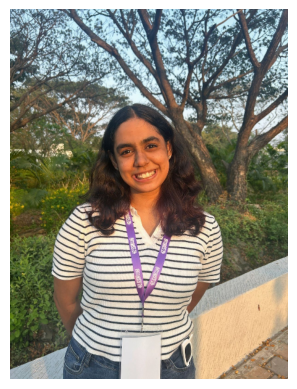

In [5]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np

# Height and width that will be used by the model
DESIRED_HEIGHT = 600
DESIRED_WIDTH = 600

# Function to resize and show images
def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h / (w / DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w / (h / DESIRED_HEIGHT)), DESIRED_HEIGHT))
    
    # Convert BGR (OpenCV format) to RGB (matplotlib format)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Show the image using matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

# Assuming you have already uploaded files, use the following code to read and display them
uploaded_files = uploader.value  # Get the uploaded files directly

# Read and display uploaded images
images = {}  # Create a dictionary to hold images
for file_info in uploaded_files:
    filename = file_info['name']  # Get the filename
    content = file_info['content']  # Get the file content
    # Convert the byte content to a numpy array
    image_array = np.frombuffer(content, np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)  # Decode the image

    if image is not None:  # Check if the image was loaded successfully
        images[filename] = image  # Save the loaded image in the dictionary
        print(f"Loaded: {filename}")
    else:
        print(f"Error loading image: {filename}")

# Iterate through images and display them
for filename, image in images.items():
    print(f"Displaying: {filename}")
    resize_and_show(image)


I0000 00:00:1730445256.263657  140412 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
W0000 00:00:1730445256.269766  140412 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1730445256.277334  140695 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730445256.283314  140700 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730445256.342156  140695 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
/Users/nithyapandurangan/Desktop/Colour-Analysis-Tool/myenv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: Use

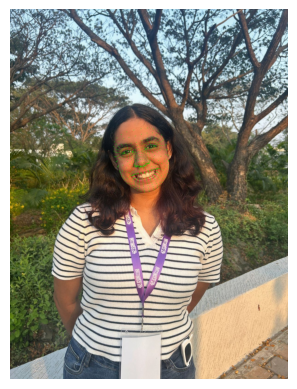

In [6]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Import the necessary modules.
# Use a valid path for your model file
base_options = python.BaseOptions(model_asset_path='/Users/nithyapandurangan/Desktop/Colour-Analysis-Tool/face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)

# Create the FaceLandmarker object
detector = vision.FaceLandmarker.create_from_options(options)

# Function to extract eye color from the image
def extract_eye_color(image, face_landmarks):
    LEFT_EYE_INDICES = [33, 133, 160, 158, 157, 154, 145, 144, 163, 7, 33]
    RIGHT_EYE_INDICES = [362, 263, 387, 385, 384, 381, 380, 373, 390, 249, 362]

    left_eye_landmarks = [face_landmarks[i] for i in LEFT_EYE_INDICES]
    right_eye_landmarks = [face_landmarks[i] for i in RIGHT_EYE_INDICES]

    h, w, _ = image.shape
    left_eye_points = np.array([[int(lm.x * w), int(lm.y * h)] for lm in left_eye_landmarks])
    right_eye_points = np.array([[int(lm.x * w), int(lm.y * h)] for lm in right_eye_landmarks])

    left_eye_mask = np.zeros_like(image)
    right_eye_mask = np.zeros_like(image)

    cv2.fillConvexPoly(left_eye_mask, left_eye_points, (255, 255, 255))
    cv2.fillConvexPoly(right_eye_mask, right_eye_points, (255, 255, 255))

    left_eye_region = cv2.bitwise_and(image, left_eye_mask)
    right_eye_region = cv2.bitwise_and(image, right_eye_mask)

    left_eye_color = cv2.mean(left_eye_region, mask=left_eye_mask[:, :, 0])[:3]
    right_eye_color = cv2.mean(right_eye_region, mask=right_eye_mask[:, :, 0])[:3]

    left_eye_color_tuple = tuple(map(int, left_eye_color))
    right_eye_color_tuple = tuple(map(int, right_eye_color))

    return left_eye_color_tuple, right_eye_color_tuple, left_eye_mask, right_eye_mask

# Function to draw landmarks on the image
def draw_landmarks_on_image(image, detection_result):
    annotated_image = image.copy()

    for face_landmarks in detection_result.face_landmarks:
        for landmark in face_landmarks:
            x = int(landmark.x * annotated_image.shape[1])
            y = int(landmark.y * annotated_image.shape[0])
            cv2.circle(annotated_image, (x, y), 1, (0, 255, 0), -1)

    return annotated_image

# STEP 3: Load the input images and detect landmarks
for file_info in uploaded_files:  # Iterate over the uploaded files
    filename = file_info['name']  # Get the filename
    content = file_info['content']  # Get the file content
    # Convert the byte content to a numpy array
    image_array = np.frombuffer(content, np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)  # Decode the image

    if image is not None:  # Check if the image was loaded successfully
        # Convert the image to the format required by Mediapipe
        mp_image = mp.Image.create_from_file(filename)

        # STEP 4: Detect face landmarks from the input image.
        detection_result = detector.detect(mp_image)

        # STEP 5: Process the detection result. In this case, visualize it.
        if detection_result.face_landmarks:
            annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), detection_result)

            # Convert the image from RGB (as returned by numpy_view) to BGR for OpenCV
            annotated_image_bgr = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)

            # Display the annotated image using matplotlib
            plt.imshow(cv2.cvtColor(annotated_image_bgr, cv2.COLOR_BGR2RGB))  # Convert back to RGB for matplotlib
            plt.axis('off')  # Hide axis
            plt.show()
        else:
            print("No face landmarks detected.")
    else:
        print(f"Error loading image: {filename}")


## Extracting eye colour

I0000 00:00:1730445261.204395  140412 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
W0000 00:00:1730445261.204805  140412 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
W0000 00:00:1730445261.213573  140772 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730445261.218899  140772 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/Users/nithyapandurangan/Desktop/Colour-Analysis-Tool/myenv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Left Eye Color (RGB): (43, 59, 87), Color Name: black
Right Eye Color (RGB): (43, 56, 86), Color Name: black
Average Eye Color (RGB): (43, 57, 86), Color Name: black


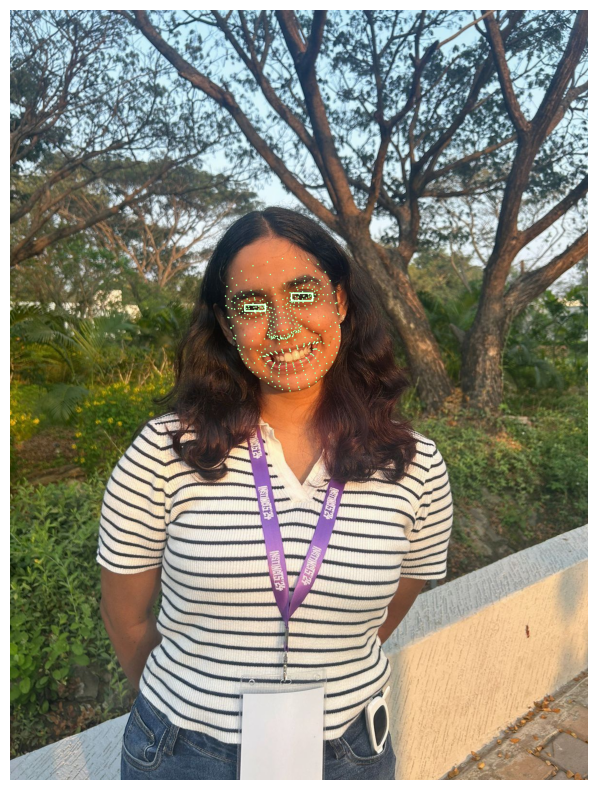

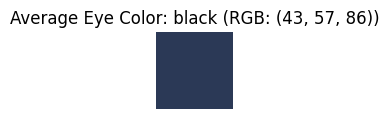

Eye Color Dictionary (EC): {'Nithya-Img.jpeg': ((43, 57, 86), 'black')}


In [7]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance

# STEP 1: Import the necessary modules.
# Use a valid path for your model file
base_options = python.BaseOptions(model_asset_path='/Users/nithyapandurangan/Desktop/Colour-Analysis-Tool/face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)

# Create the FaceLandmarker object
detector = vision.FaceLandmarker.create_from_options(options)

# Define a color dictionary for eye color detection
CSS4_COLORS = {
    "red": (255, 0, 0),
    "green": (0, 255, 0),
    "blue": (0, 0, 255),
    "black": (0, 0, 0),
    "white": (255, 255, 255),
    "yellow": (255, 255, 0),
    "cyan": (0, 255, 255),
    "magenta": (255, 0, 255),
    "brown": (165, 42, 42),
    "violet": (238, 130, 238),
    "hazel": (148, 114, 47),  # Added hazel
    "gray": (169, 169, 169),   # Added gray
    "amber": (255, 191, 0)     # Added amber
}

# EC dictionary to store eye colors
EC = {}

# Function to find the closest color name using Euclidean distance
def closest_color(rgb):
    min_dist = float('inf')
    closest_color_name = None

    for name, color in CSS4_COLORS.items():
        dist = distance.euclidean(rgb, color)
        if dist < min_dist:
            min_dist = dist
            closest_color_name = name

    return closest_color_name

# Function to extract eye color from the image
def extract_eye_color(image, face_landmarks):
    LEFT_EYE_INDICES = [33, 133, 160, 158, 157, 154, 145, 144, 163, 7, 33]
    RIGHT_EYE_INDICES = [362, 263, 387, 385, 384, 381, 380, 373, 390, 249, 362]

    left_eye_landmarks = [face_landmarks[i] for i in LEFT_EYE_INDICES]
    right_eye_landmarks = [face_landmarks[i] for i in RIGHT_EYE_INDICES]

    h, w, _ = image.shape
    left_eye_points = np.array([[int(lm.x * w), int(lm.y * h)] for lm in left_eye_landmarks])
    right_eye_points = np.array([[int(lm.x * w), int(lm.y * h)] for lm in right_eye_landmarks])

    left_eye_mask = np.zeros_like(image)
    right_eye_mask = np.zeros_like(image)

    cv2.fillConvexPoly(left_eye_mask, left_eye_points, (255, 255, 255))
    cv2.fillConvexPoly(right_eye_mask, right_eye_points, (255, 255, 255))

    left_eye_region = cv2.bitwise_and(image, left_eye_mask)
    right_eye_region = cv2.bitwise_and(image, right_eye_mask)

    left_eye_color = cv2.mean(left_eye_region, mask=left_eye_mask[:, :, 0])[:3]
    right_eye_color = cv2.mean(right_eye_region, mask=right_eye_mask[:, :, 0])[:3]

    left_eye_color_tuple = tuple(map(int, left_eye_color))
    right_eye_color_tuple = tuple(map(int, right_eye_color))

    left_eye_color_name = closest_color(left_eye_color_tuple)
    right_eye_color_name = closest_color(right_eye_color_tuple)

    # Return a structured tuple
    return (left_eye_color_tuple, left_eye_color_name), (right_eye_color_tuple, right_eye_color_name), left_eye_points, right_eye_points

# Function to draw landmarks and bounding boxes on the image
def draw_landmarks_on_image(image, detection_result):
    annotated_image = image.copy()

    for face_landmarks in detection_result.face_landmarks:
        for landmark in face_landmarks:
            x = int(landmark.x * annotated_image.shape[1])
            y = int(landmark.y * annotated_image.shape[0])
            cv2.circle(annotated_image, (x, y), 1, (0, 255, 0), -1)

    return annotated_image

# Function to draw bounding boxes around the eyes
def draw_eye_boxes(image, left_eye_points, right_eye_points):
    cv2.rectangle(image, (min(left_eye_points[:, 0]), min(left_eye_points[:, 1])),
                  (max(left_eye_points[:, 0]), max(left_eye_points[:, 1])), (0, 255, 0), 2)
    cv2.rectangle(image, (min(right_eye_points[:, 0]), min(right_eye_points[:, 1])),
                  (max(right_eye_points[:, 0]), max(right_eye_points[:, 1])), (0, 255, 0), 2)

# STEP 3: Load the input images and detect landmarks
for file_info in uploaded_files:  # Iterate over the uploaded files
    filename = file_info['name']  # Get the filename
    content = file_info['content']  # Get the file content
    
    # Convert the byte content to a numpy array
    image_array = np.frombuffer(content, np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)  # Decode the image

    if image is not None:  # Check if the image was loaded successfully
        # Convert the image to the format required by Mediapipe
        mp_image = mp.Image.create_from_file(filename)

        # STEP 4: Detect face landmarks from the input image.
        detection_result = detector.detect(mp_image)

        # STEP 5: Process the detection result. In this case, visualize it.
        if detection_result.face_landmarks:
            annotated_image = draw_landmarks_on_image(mp_image.numpy_view(), detection_result)

            # Extract eye colors
            # Extract eye colors
            left_eye_info, right_eye_info, left_eye_points, right_eye_points = extract_eye_color(image, detection_result.face_landmarks[0])

            # Calculate the average eye color
            avg_eye_color = tuple(np.mean([left_eye_info[0], right_eye_info[0]], axis=0).astype(int))
            avg_eye_color_name = closest_color(avg_eye_color)

            # Store the average eye color in the EC dictionary
            EC[filename] = (avg_eye_color, avg_eye_color_name)

            print(f"Left Eye Color (RGB): {left_eye_info[0]}, Color Name: {left_eye_info[1]}")
            print(f"Right Eye Color (RGB): {right_eye_info[0]}, Color Name: {right_eye_info[1]}")
            print(f"Average Eye Color (RGB): {avg_eye_color}, Color Name: {avg_eye_color_name}")

            # Draw bounding boxes around the eyes
            draw_eye_boxes(annotated_image, 
                           left_eye_points,  # Correctly using left_eye_points
                           right_eye_points)  # Correctly using right_eye_points

            # Display the annotated image using matplotlib
            plt.figure(figsize=(10, 10))
            plt.imshow(annotated_image)  # Print as is without converting to RGB
            plt.axis('off')  # Hide axis

            # Display the color swatch for the average eye color
            plt.figure(figsize=(2, 1))
            plt.imshow(np.full((10, 10, 3), avg_eye_color, dtype=np.uint8))
            plt.axis('off')  # Hide axis
            plt.title(f'Average Eye Color: {avg_eye_color_name} (RGB: {avg_eye_color})')
            plt.show()
        else:
            print("No face landmarks detected.")
    else:
        print(f"Error loading image: {filename}")

# Print the EC dictionary
print("Eye Color Dictionary (EC):", EC)


## Skin Colour

I0000 00:00:1730445290.058085  140412 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
W0000 00:00:1730445290.061133  140995 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1730445290.064282  140995 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/Users/nithyapandurangan/Desktop/Colour-Analysis-Tool/myenv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


The skin tone is: Warm


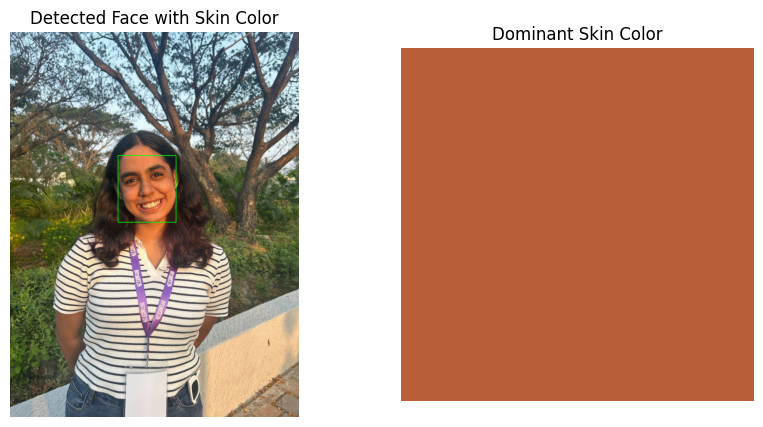

Dominant skin color (BGR): [ 55  95 184]
Dictionary of skin colors: {'Nithya-Img.jpeg': {'color': array([ 55,  95, 184]), 'tone': 'Warm'}}


In [8]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize MediaPipe face mesh
mp_face_mesh = mp.solutions.face_mesh

# Function to extract skin color using facial landmarks
def extract_skin_color(image):
    with mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=1, min_detection_confidence=0.5) as face_mesh:
        # Convert image to RGB for MediaPipe
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image_rgb)

        # Check if any face is detected
        if results.multi_face_landmarks:
            face_landmarks = results.multi_face_landmarks[0].landmark
            ih, iw, _ = image.shape

            # Collect pixel values for more comprehensive skin sampling
            skin_pixels = []
            for landmark in face_landmarks:
                # Get x, y coordinates
                x = int(landmark.x * iw)
                y = int(landmark.y * ih)
                # Ensure coordinates are within image bounds
                if 0 <= x < iw and 0 <= y < ih:
                    skin_pixels.append(image[y, x])

            # Convert the list to a NumPy array for K-means clustering
            skin_pixels = np.array(skin_pixels)

            # Perform K-means clustering to find the dominant skin color
            n_clusters = 5  # More clusters to capture variation
            kmeans = KMeans(n_clusters=n_clusters)
            kmeans.fit(skin_pixels)

            # Get the most frequent color (dominant)
            unique, counts = np.unique(kmeans.labels_, return_counts=True)
            dominant_color = kmeans.cluster_centers_[unique[np.argmax(counts)]].astype(int)

            # Get the bounding box of the face for visualization
            bbox = get_face_bbox(results, ih, iw)

            return bbox, dominant_color

    print("No face detected in the image.")
    return None, None

# Helper function to get face bounding box from the results
def get_face_bbox(results, ih, iw):
    face_landmarks = results.multi_face_landmarks[0].landmark
    xs = [landmark.x for landmark in face_landmarks]
    ys = [landmark.y for landmark in face_landmarks]
    x_min = int(min(xs) * iw)
    x_max = int(max(xs) * iw)
    y_min = int(min(ys) * ih)
    y_max = int(max(ys) * ih)
    return x_min, y_min, x_max - x_min, y_max - y_min

# Function to determine the skin tone based on RGB color
def determine_skin_tone(rgb_color):
    r, g, b = rgb_color
    if r > g and r > b:
        return "Warm"
    elif b > r and b > g:
        return "Cool"
    else:
        return "Neutral"

# Initialize a dictionary to store skin colors
SC = {}  # Skin Color dictionary

# Process each uploaded file
for file_info in uploaded_files:  # Iterate over the uploaded files
    filename = file_info['name']  # Get the filename
    content = file_info['content']  # Get the file content

    # Convert the byte content to a numpy array
    image_array = np.frombuffer(content, np.uint8)
    image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)  # Decode the image

    # Check if the image is loaded correctly
    if image is None or image.size == 0:  # Check if the image is empty
        print(f"Error loading image: {filename}. The image is empty.")
        continue

    # Extract bounding box and dominant skin color
    bbox, skin_color = extract_skin_color(image)

    if skin_color is not None:
        # Draw rectangle around the face region
        cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[0] + bbox[2], bbox[1] + bbox[3]), (0, 255, 0), 2)

        # Create a blank image filled with the skin color
        color_image = np.full((100, 100, 3), skin_color, dtype=np.uint8)

        # Convert BGR to RGB for displaying
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

        # Determine warmth or coolness
        skin_color_rgb = (skin_color[2], skin_color[1], skin_color[0])  # Convert BGR to RGB
        tone = determine_skin_tone(skin_color_rgb)
        print(f"The skin tone is: {tone}")

        # Display the original image and the skin color
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(image_rgb)
        plt.title('Detected Face with Skin Color')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(color_image_rgb)
        plt.title('Dominant Skin Color')
        plt.axis('off')

        plt.show()

        print(f"Dominant skin color (BGR): {skin_color}")
        SC[filename] = {'color': skin_color, 'tone': tone}  # Store the skin color and tone in the SC dictionary

    else:
        print(f"Failed to extract skin color from image: {filename}.")

# Output the dictionary of skin colors
print("Dictionary of skin colors:", SC)


## Hair Colour

Processing image: Nithya-Img.jpeg


I0000 00:00:1730445515.830991  140412 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M1
/Users/nithyapandurangan/Desktop/Colour-Analysis-Tool/myenv/lib/python3.11/site-packages/mediapipe/tasks/python/vision/image_segmenter.py:158: UserWarning: MessageFactory class is deprecated. Please use GetMessageClass() instead of MessageFactory.GetPrototype. MessageFactory class will be removed after 2024.
  graph_config = self._runner.get_graph_config()
W0000 00:00:1730445515.840436  143929 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Dominant Hair Color (BGR): (26, 28, 37)


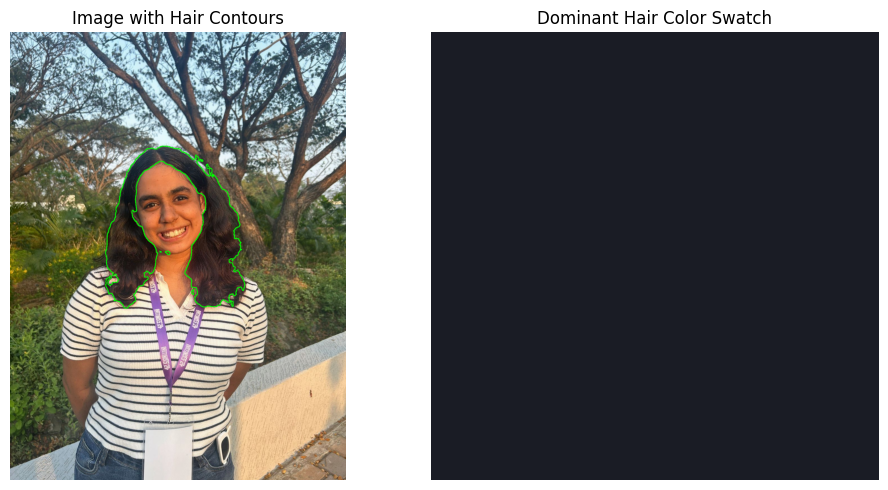

Dictionary of dominant hair colors (BGR): {'Nithya-Img.jpeg': (26, 28, 37)}


In [10]:
import cv2
import numpy as np
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set the model path (update with your actual path to the model)
model_path = r"hair_segmenter.tflite"

# Create options for the ImageSegmenter
base_options = python.BaseOptions(model_asset_path=model_path)
# Initialize the segmenter options without output_category
options = vision.ImageSegmenterOptions(base_options=base_options, output_category_mask=True)

# Function to get the dominant color from hair pixels using K-means
def get_dominant_color(hair_pixels):
    if len(hair_pixels) < 2:  # Not enough data to cluster
        return hair_pixels[0] if len(hair_pixels) == 1 else np.array([0, 0, 0])

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(hair_pixels)
    dominant_color = kmeans.cluster_centers_[np.argmax(np.bincount(kmeans.labels_))]  # Most frequent cluster
    return np.uint8(dominant_color)

# Function to display images inline using Matplotlib
def display_images_with_swatches(original_img, contoured_img, color_swatch):
    # Create a figure to display the images side by side
    plt.figure(figsize=(10, 5))  # Adjusted figure size for better layout

    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(contoured_img, cv2.COLOR_BGR2RGB))
    plt.title('Image with Hair Contours')
    plt.axis('off')

    # Color Swatch (smaller size)
    plt.subplot(1, 2, 2)
    plt.imshow(color_swatch)
    plt.title('Dominant Hair Color Swatch')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Function to segment hair, contour the hair region, and display the color swatch
def segment_hair_and_identify_color(image):
    # Convert the image to RGB format for MediaPipe
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create the ImageSegmenter
    with vision.ImageSegmenter.create_from_options(options) as segmenter:
        # Create MediaPipe Image
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image_rgb)

        # Perform segmentation
        segmentation_result = segmenter.segment(mp_image)
        category_mask = segmentation_result.category_mask.numpy_view()

        # Extract hair pixels (assuming hair category is represented by 1)
        hair_pixels = image[category_mask == 1]

        # Check if there are any hair pixels
        if len(hair_pixels) == 0:
            print(f"No hair pixels found in the image.")
            return None  # Return None if no hair pixels are found

        # Calculate the dominant hair color using K-means clustering
        dominant_hair_color_bgr = get_dominant_color(hair_pixels)
        print(f"Dominant Hair Color (BGR): {tuple(dominant_hair_color_bgr)}")

        # Create a mask for the hair region
        hair_mask = np.zeros(image.shape, dtype=np.uint8)
        hair_mask[category_mask == 1] = image[category_mask == 1]

        # Draw contours around the hair region on the original image
        contours, _ = cv2.findContours(category_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        image_with_contours = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 2)

        # Create a smaller color swatch for the detected dominant color
        swatch_size = 50  # Smaller size for the swatch
        color_swatch = np.full((swatch_size, swatch_size, 3), dominant_hair_color_bgr.tolist(), dtype=np.uint8)

        # Display results using Matplotlib
        display_images_with_swatches(image, image_with_contours, color_swatch)

        return dominant_hair_color_bgr  # Return the dominant hair color

# Initialize a dictionary to store hair colors
HC = {}

# Example usage for processing uploaded files
def process_uploaded_files(uploaded_files):
    for file_info in uploaded_files:
        filename = file_info['name']  # Get the filename
        content = file_info['content']  # Get the file content

        # Convert the byte content to a numpy array
        image_array = np.frombuffer(content, np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)  # Decode the image

        if image is None or image.size == 0:
            print(f"Error loading image: {filename}. The image is empty.")
            continue

        print(f"Processing image: {filename}")
        dominant_hair_color = segment_hair_and_identify_color(image)
        
        if dominant_hair_color is not None:
            HC[filename] = tuple(dominant_hair_color)  # Store the hair color with the filename

# Process the uploaded files
process_uploaded_files(uploaded_files)

# Output the dictionary of dominant hair colors
print("Dictionary of dominant hair colors (BGR):", HC)


## Algorithm

In [11]:
print("EC: ", EC)
print("SC: ", SC)
print("HC: ", HC)

EC:  {'Nithya-Img.jpeg': ((43, 57, 86), 'black')}
SC:  {'Nithya-Img.jpeg': {'color': array([ 55,  95, 184]), 'tone': 'Warm'}}
HC:  {'Nithya-Img.jpeg': (26, 28, 37)}


### Simple analysis using degree of warmth of features

In [13]:
# Iterate through the filenames present in the eye color dictionary (EC)
for filename in EC.keys():
    if filename in SC and filename in HC:  # Ensure the filename exists in all dictionaries
        eye_color = EC[filename][0]  # Extract average eye color (BGR format)
        skin_color = SC[filename]['color']  # Skin color (BGR format)
        skin_tone = SC[filename]['tone']  # Skin tone (string)
        hair_color = HC[filename]  # Hair color (BGR format)

        # Compute the season
        season = determine_season(eye_color, skin_color, skin_tone, hair_color)

        # Determine warmth of each feature
        eye_warmth = "Warm" if is_warm(eye_color) else "Cool"
        skin_warmth = "Warm" if is_warm(skin_color) else "Cool"
        hair_warmth = "Warm" if is_warm(hair_color) else "Cool"

        # Store the result in the dictionary
        seasons_dict[filename] = season
        
        # Print the results
        print(f"The season for {filename} is: {season}")
        print(f"Eye warmth: {eye_warmth}, Skin warmth: {skin_warmth}, Hair warmth: {hair_warmth}")

        # Display the image
        img = cv2.imread(filename)  # Read the image from the filename
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
        plt.title(f"Image: {filename}")
        plt.axis('off')
        plt.show()
        
    else:
        print(f"Missing data for {filename} in skin color or hair color.")


NameError: name 'determine_season' is not defined

### More complex seasonal colour analysis using hue, chroma, value and contrast

The season for RESHMI.MP.jpg.jpg is: Deep Autumn
Hue: Warm, Chroma: Muted, Value: Dark, Contrast: 0.38


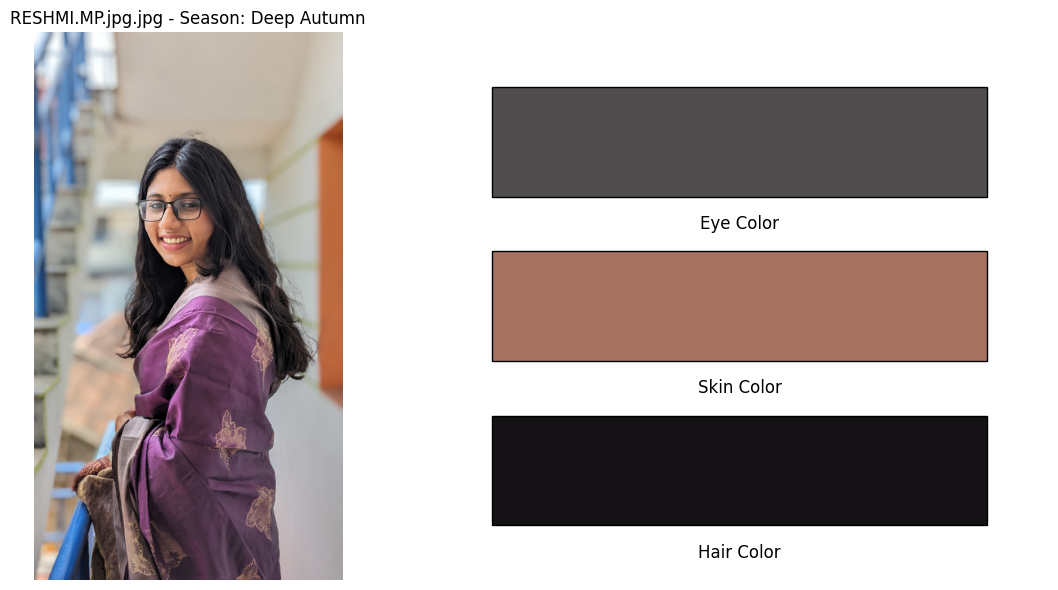

(78, 77, 80) [ 97 115 167] (21, 18, 20)
Seasons for each image: {'RESHMI.MP.jpg.jpg': 'Deep Autumn'}


In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to convert BGR to HSL
def bgr_to_hsl(bgr):
    bgr = np.array(bgr, dtype=np.float32) / 255.0  # Normalize to [0, 1]
    rgb = cv2.cvtColor(np.uint8([[bgr]]), cv2.COLOR_BGR2RGB)[0][0]
    h, l, s = cv2.cvtColor(np.uint8([[rgb]]), cv2.COLOR_RGB2HLS)[0][0]  # HLS in [0, 255]
    return int(h), s / 255.0, l / 255.0  # Normalize S and L to [0, 1]

# Function to classify hue (warm/cool)
def classify_hue(h):
    if 0 <= h < 60 or 300 <= h <= 360:
        return "Warm"
    else:
        return "Cool"

# Function to classify chroma (bright/muted)
def classify_chroma(s):
    return "Bright" if s >= 0.5 else "Muted"

# Function to classify value (light/medium/dark)
def classify_value(l):
    if l >= 0.75:
        return "Light"
    elif l >= 0.35:
        return "Medium"
    else:
        return "Dark"

# Function to convert BGR to grayscale
def bgr_to_gray(bgr):
    r, g, b = bgr
    # Using the standard grayscale conversion formula
    gray = 0.299 * r + 0.587 * g + 0.114 * b
    return gray / 255.0  # Normalize to [0, 1]

# Function to calculate contrast between two grayscale values
def calculate_contrast(grayscale1, grayscale2):
    return abs(grayscale1 - grayscale2)

# Function to classify the season
def classify_season(hue, chroma, value, contrast):
    # Classify the season based on hue, chroma, value, and contrast
    if hue == "Warm":
        if chroma == "Bright":
            if value == "Light":
                return "Bright Spring"
            elif value == "Medium":
                return "True Spring"
            else:
                return "Warm Spring"
        else:
            if contrast < 0.1:  # Low contrast suggests softer tones
                return "Soft Autumn"
            elif value == "Light":
                return "Soft Autumn"
            elif value == "Medium":
                return "True Autumn"
            else:
                return "Deep Autumn"
    else:  # Cool hue
        if chroma == "Bright":
            if value == "Light":
                return "Light Summer"
            elif value == "Medium":
                return "True Summer"
            else:
                return "Cool Summer"
        else:
            if contrast < 0.1:  # Low contrast suggests softer tones
                return "Light Winter"
            elif value == "Light":
                return "Light Winter"
            elif value == "Medium":
                return "True Winter"
            else:
                return "Deep Winter"
            
# Function to display color squares for eye, skin, and hair colors
def display_color_squares(eye_color, skin_color, hair_color, filename, season):
    fig, (ax_image, ax_colors) = plt.subplots(1, 2, figsize=(12, 6))

    # Display the image in the first subplot without stretching
    img = cv2.imread(filename)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax_image.imshow(img_rgb)
    ax_image.set_title(f"{filename} - Season: {season}")
    ax_image.axis('off')  # Remove the axis for the image

    # Create squares for eye, skin, and hair color in the second subplot
    colors = [eye_color, skin_color, hair_color]
    labels = ["Eye Color", "Skin Color", "Hair Color"]

    for i, (color, label) in enumerate(zip(colors, labels)):
        # Convert BGR to RGB
        color_rgb = np.array(color[::-1]) / 255.0  # Reverse the order for RGB
        rect = patches.Rectangle((0.1, 0.7 - 0.3 * i), 0.8, 0.2, facecolor=color_rgb, edgecolor="black")
        ax_colors.add_patch(rect)
        ax_colors.text(0.5, 0.65 - 0.3 * i, label, fontsize=12, ha="center", va="center")

    ax_colors.set_xlim(0, 1)
    ax_colors.set_ylim(0, 1)
    ax_colors.axis('off')  # Remove axis for color display

    plt.tight_layout()
    plt.show()

# Initialize a dictionary to store the seasons for each image
seasons_dict = {}

# Ensure uploaded_files contains valid filenames
for file_info in uploaded_files:
    filename = file_info['name']  # Extract the filename from the Bunch or structured object

    if filename in EC and filename in SC and filename in HC:  # Ensure all data is available

        # Extract the BGR color from the EC dictionary correctly
        eye_color = EC[filename][0]  # Only take the BGR values, which is the first element in the tuple
        skin_color = SC[filename]['color']  # Skin color in BGR format
        hair_color = HC[filename]  # Hair color in BGR format

        # Convert colors to HSL
        eye_hsl = bgr_to_hsl(eye_color)
        skin_hsl = bgr_to_hsl(skin_color)
        hair_hsl = bgr_to_hsl(hair_color)

        # Classify hue, chroma, and value for skin (the most dominant factor in color analysis)
        hue_classification = classify_hue(skin_hsl[0])
        chroma_classification = classify_chroma(skin_hsl[1])
        value_classification = classify_value(skin_hsl[2])

        # Convert skin and hair colors to grayscale
        skin_gray = bgr_to_gray(skin_color)
        hair_gray = bgr_to_gray(hair_color)

        # Calculate contrast between grayscale skin and hair values
        contrast = calculate_contrast(skin_gray, hair_gray)

        # Determine the season based on hue, chroma, value, and contrast
        season = classify_season(hue_classification, chroma_classification, value_classification, contrast)

        # Store the season for the image
        seasons_dict[filename] = season

        # Print the results
        print(f"The season for {filename} is: {season}")
        print(f"Hue: {hue_classification}, Chroma: {chroma_classification}, Value: {value_classification}, Contrast: {contrast:.2f}")

        # Display the image and color squares
        display_color_squares(eye_color, skin_color, hair_color, filename, season)
        print(eye_color, skin_color, hair_color)
    else:
        print(f"Missing data for {filename}.")

# Output the seasons dictionary
print("Seasons for each image:", seasons_dict)
